Interpolation(내삽)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [3]:
x = [1,2,3]
y = [3,2,0]
#x와 y 값이 이렇게 주어질 때, 
result = np.interp(2.5, x, y) #interp 함수를 이용해서 x가 2.5일 때 y값을 구하겠다. 
print(result)

1.0


In [4]:
ynew = np.interp([0,1,1.5,2.72,3.14], x, y)
print(ynew)
#배열에 대응되는 값도 출력이 가능함.

[3.   3.   2.5  0.56 0.  ]


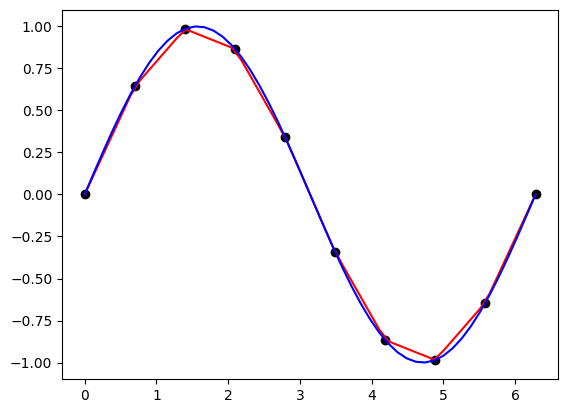

In [5]:
x = np.linspace(0.0, 2*np.pi, 10)
y = np.sin(x)
plt.plot(x, y, 'o', color='black')

xnew = np.linspace(0.0, 2*np.pi, 50)
ynew = np.interp(xnew, x, y)
plt.plot(xnew, ynew, '-', color='r')

ytrue = np.sin(xnew)
plt.plot(xnew, ytrue, '-', color='blue')

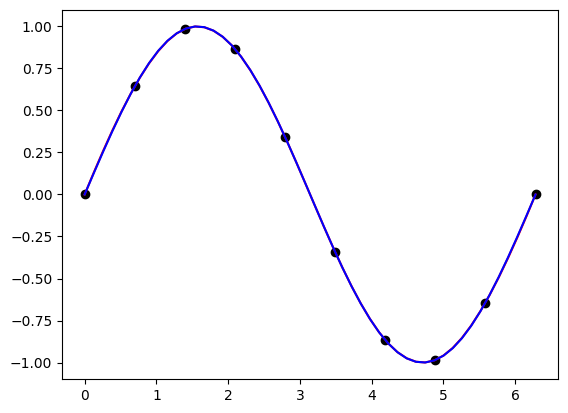

In [6]:
from scipy import interpolate

x = np.linspace(0.0, 2*np.pi, 10)
y = np.sin(x)

new_func = interpolate.interp1d(x, y, kind='cubic') #kind는 종류

xnew = np.linspace(0.0, 2*np.pi, 50)
ynew = new_func(xnew)

plt.plot(x, y, 'o', color='black')
plt.plot(xnew, ynew, '-', color='red')

ytrue = np.sin(xnew)
plt.plot(xnew, ytrue, '-', color='blue')

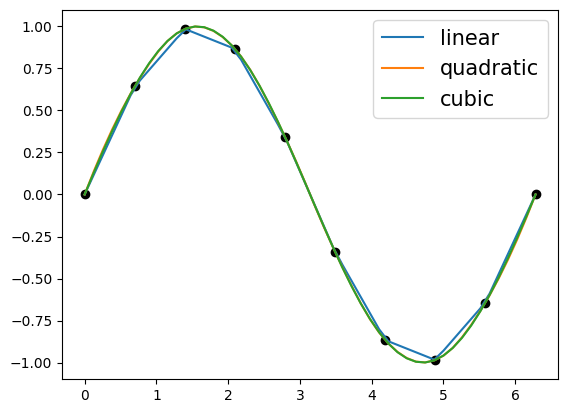

In [7]:
x = np.linspace(0.0, 2*np.pi, 10)
y = np.sin(x)
plt.plot(x, y, 'o', color='black')

xnew = np.linspace(0.0, 2*np.pi, 50)
for i in ['linear', 'quadratic', 'cubic']:
    func = interpolate.interp1d(x, y, kind=i)
    ynew = func(xnew)
    plt.plot(xnew, ynew, label=i)

plt.legend(loc='upper right', fontsize=15)

C:\Users\jimin\AppData\Local\Temp\ipykernel_20388\910705694.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'ro', c='black')


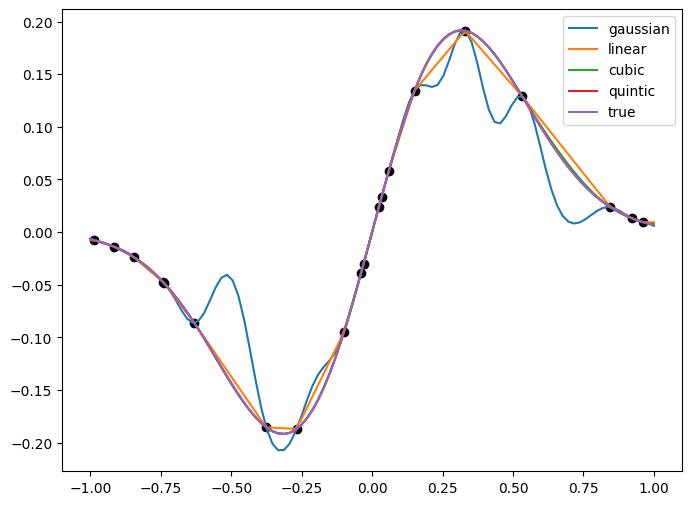

In [8]:
def func(x):
    return x*np.exp(-5.0*x**2)

x = np.random.uniform(-1.0, 1.0, size=20)
y = func(x)

fig = plt.figure(figsize=(8,6))
plt.plot(x, y, 'ro', c='black')

xnew = np.linspace(-1, 1, 100)

for i in ['gaussian', 'linear', 'cubic', 'quintic']:
    newfunc = interpolate.Rbf(x, y, function=i)
    ynew = newfunc(xnew)
    plt.plot(xnew, ynew, label=i)

plt.plot(xnew, func(xnew), label='true')
plt.legend(loc='upper right')

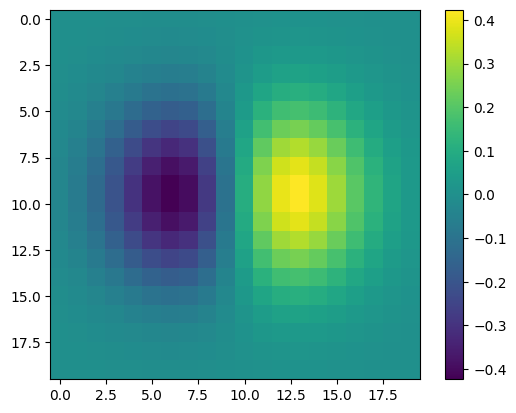

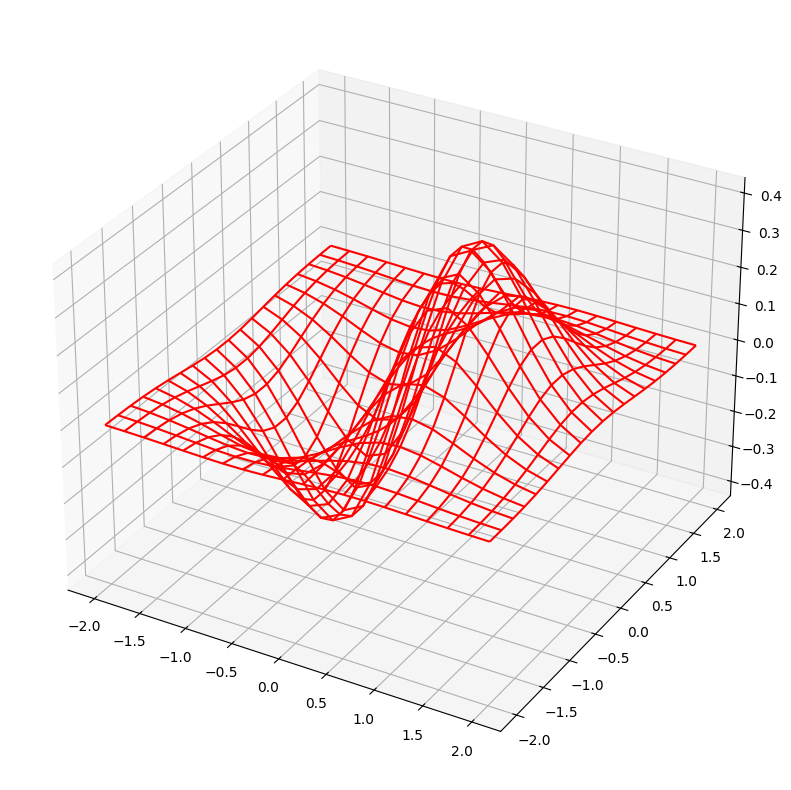

In [9]:
from mpl_toolkits.mplot3d import Axes3D

#f(x,y) = x*np.exp(-x**2-y**2) = z
def func(x,y):
    return x*np.exp(-(x**2+y**2))

x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)

xgrid, ygrid = np.meshgrid(x,y)
z = func(xgrid, ygrid)

#2-d projection
plt.imshow(z)
plt.colorbar()

#3-d projection
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(xgrid, ygrid, z, color='r')

C:\Users\jimin\AppData\Local\Temp\ipykernel_20388\2132514515.py:2: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  newfunc = interpolate.interp2d(x, y, z, kind='cubic')
C:\Users\jimin\AppData\Local\Temp\ipykernel_20388\2132514515.py:5: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` 

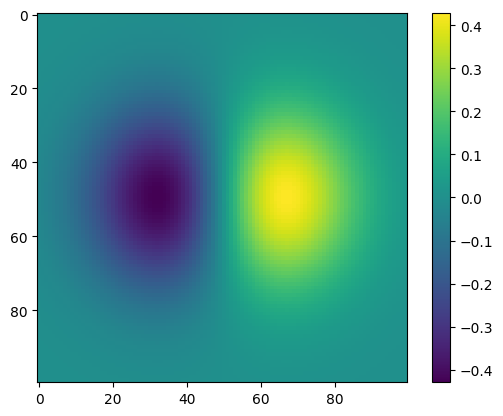

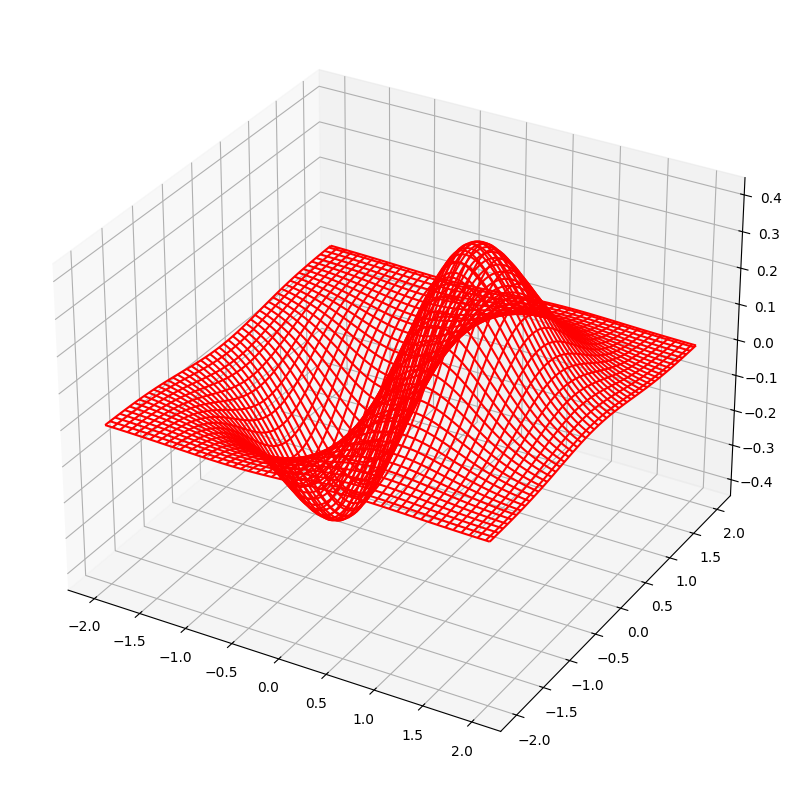

In [10]:
#2d에서 interpolate하여 더 촘촘히 만들기 위해서 다른 함수 사용해줄 것임.
newfunc = interpolate.interp2d(x, y, z, kind='cubic')
xnew = np.linspace(-2, 2, 100)
ynew = np.linspace(-2, 2, 100)
znew = newfunc(xnew, ynew)

xnewgrid, ynewgrid = np.meshgrid(xnew, ynew)

#2-d projection
plt.imshow(znew) #plt.imshow(znew, cmap=plt.cm.viridis)
plt.colorbar()

#3-d projection
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(xnewgrid, ynewgrid, znew, color='r')


Integration(적분)

In [11]:
from scipy.integrate import trapz
#trapz 선형근사로 적분, 사다리꼴
from scipy.integrate import simps
#simps 곡선근사로 적분
from scipy.integrate import quad
"""- 어떤 영역을 bining 해주는 것... bining 많이 해줄 수록 실제 함수와 가까워짐. 실제함수 밑 영역 적분하는 것과 유사해짐.
n을 늘리면 좋으나 늘릴 수록 계산 시간도 개커짐. --> n = 1000, n = 10000 일 때 값이 비슷한데 시간은 차이 나니 더이상 나아갈 필요가 없는 것임.
그럴 때 자동으로 프로그래밍해주는 것이 quad 함수"""
from scipy.integrate import nquad

10.049382716049383
the err with Trapezoidal integral: 0.004938271604938293
10.0
the err with Simpson's integral: 0.0


C:\Users\jimin\AppData\Local\Temp\ipykernel_20388\1511988595.py:9: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  result_t = trapz(y, x, dx=0.01) #dx는 x의 변화량 delta x
C:\Users\jimin\AppData\Local\Temp\ipykernel_20388\1511988595.py:14: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  result_s = simps(y, x, dx=0.01) #dx는 x의 변화량 delta x


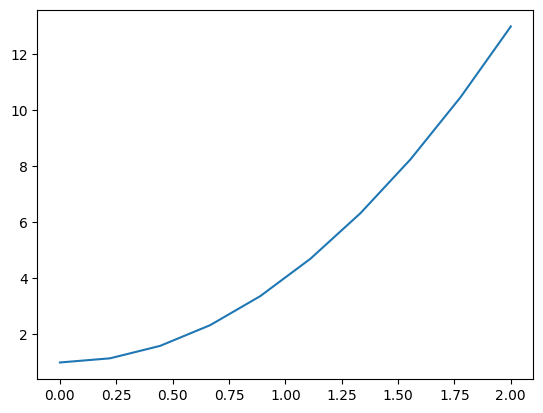

In [12]:
#f(x) = 3*x**2 + 1: (0,2)
#Trapezoidal Rule (사다리꼴 근사 적분)

x = np.linspace(0,2,10)
y = 3*x**2 + 1
plt.plot(x,y)
true_value = 10.0 #오차를 비교하기 위해 실제 적분값을 써 놓은 것임.

result_t = trapz(y, x, dx=0.01) #dx는 x의 변화량 delta x
print(result_t)
err_t = np.abs(true_value-result_t)/true_value #err in err rate
print('the err with Trapezoidal integral:',err_t)

result_s = simps(y, x, dx=0.01) #dx는 x의 변화량 delta x
print(result_s)
err_s = np.abs(true_value-result_s)/true_value #err in err rate
print("the err with Simpson's integral:",err_s)


In [13]:
def my_f(x):
    return 3*x**2 + 1

def my_trapz(my_f, a, b, n):
    #x값의 범위는 a부터 b까지 n등분 하겠다. 
    x = np.linspace(a,b,n+1)
    #n+1을 해야 n등분함.
    y = my_f(x)
    h = float(b-a)/n
    value = h/2.*(y[0] + 2.0*np.sum(y[1:n]) + y[n])
    #Trapezoidal Rule (사다리꼴 근사 적분)이기 때문에 넓이 = h/2*(y[0]+2y[1]+y[2])
    #2.0*np.sum(y[1:n])에서 sum을 써준 이유는 시그마합계를 재현하기 위함
    #h/2.0을 하는 이유는 다른 값들이 실수이므로 에러 방지를 위해 2또한 2.0으로 사용
    return value

result = my_trapz(my_f, 0, 2, 200) #n을 늘려갈 수록 오차는 줄어든다. 
print(result)


10.000100000000002


In [14]:
def integrand(x):
    return 3*x**2 + 1

result = quad(integrand, 0, 2) #integrand는 피적분함수 
print(result) #(적분값, 에러값)

(10.000000000000002, 1.1102230246251568e-13)


In [15]:
def integrand(x, a, b): #a와 b 모두 변수
    return a*x**2 + b

a = 2
b = 1

Integrand_result = quad(integrand, 0, 1, args=(a,b))
print(Integrand_result)

(1.6666666666666667, 1.8503717077085944e-14)


In [16]:
#En(x) = intgral e**-xt / t**n  dt: t is 1 to infinite
def integrand(t, n, x):
    return np.exp(-x*t)/t**n

#En(x)
n = 1
x = 2
value, err = quad(integrand, 1, np.inf, args=(n, x))
#integrand는 t에 대한 함수, argz=(n,x)로 나머지 변수를 고려해줌
print(value)

0.04890051070805328


In [17]:
#Double Integration (이중적분)
#In = integral(0 to inf) integral(1 to inf) e**-xt / t**n dt dx = 1/n

def integ2(t, n, x):
    return np.exp(-x*t)/t**n

def integ1(x, n):
    return quad(integ2, 1.0, np.inf, args=(n,x))[0]
#t에 관하여 적분한다. 
#quad하면 값이 아닌 tuple값이 나오기 때문에 인덱스 사용해서 값 나오게 하기

#이중적분 때는 바깥쪽에서부터 시작
n = 3.0
I = quad(integ1, 0.0, np.inf, args=(n))
#적분해서 x를 없앴으므로 args 안에 n만 넣어줌

print(I)
print(I[0])

(0.33333333325010883, 2.8604069920115143e-09)
0.33333333325010883


In [18]:
#I = integral (y=0 to 1/2) integral (x=0 to 1-2y) xy dx dy = 1/96
def integ2(x,y):
    return x*y

def integ1(y):
    return quad(integ2, 0.0, 1.0-2.0*y, args=(y))[0]

I = quad(integ1, 0.0, 0.5)
print(I)
print(I[0])

(0.010416666666666668, 1.1564823173178715e-16)
0.010416666666666668


In [19]:
#I = integral (y=0 to 1/2) integral (x=0 to 1-2y) xy dx dy = 1/96
def f(x,y):
    return x*y

def bounds_y():
    return [0, 0.5]

def bounds_x(y):
    return [0, 1-2*y]
#x와 y의 영역을 설정

I = nquad(f, [bounds_x, bounds_y])
print(I[0])


0.010416666666666668


Random Number / Sampling

In [20]:
x = np.random.randint(100) #0에서 100까지 정수 하나 임의로 반환
print(x)

27


In [21]:
x = np.random.randint(100) #0에서 100까지 정수 하나 임의로 반환
print(x)

60


In [22]:
x = np.random.uniform(0,1) #0에서 1까지 실수 하나 임의로 반환
y = np.random.uniform(0,1,30) #0에서 1까지 실수 30개 임의로 반환
z = np.random.uniform(1,10) #1에서 10까지 실수 하나 임의로 반환
print(x)
print(y)
print(z)

0.9702022262570383
[0.33856209 0.41130234 0.98209281 0.11994898 0.48525202 0.76114539
 0.58327269 0.2981003  0.69129337 0.1305707  0.48493936 0.64519353
 0.29033011 0.55834929 0.8050381  0.00974096 0.25185245 0.74990167
 0.43660605 0.37618156 0.23826636 0.66932173 0.97785755 0.90019299
 0.28563199 0.16375763 0.62949411 0.83200015 0.35776345 0.99037675]
8.111472497911855


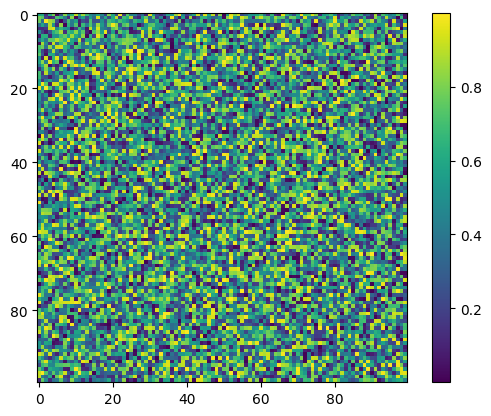

In [23]:
a = np.random.random([100,100]) #100*100 array를 임의로 만들겠다.
plt.imshow(a)
plt.colorbar()

Text(0.5, 1.0, 'Good random')

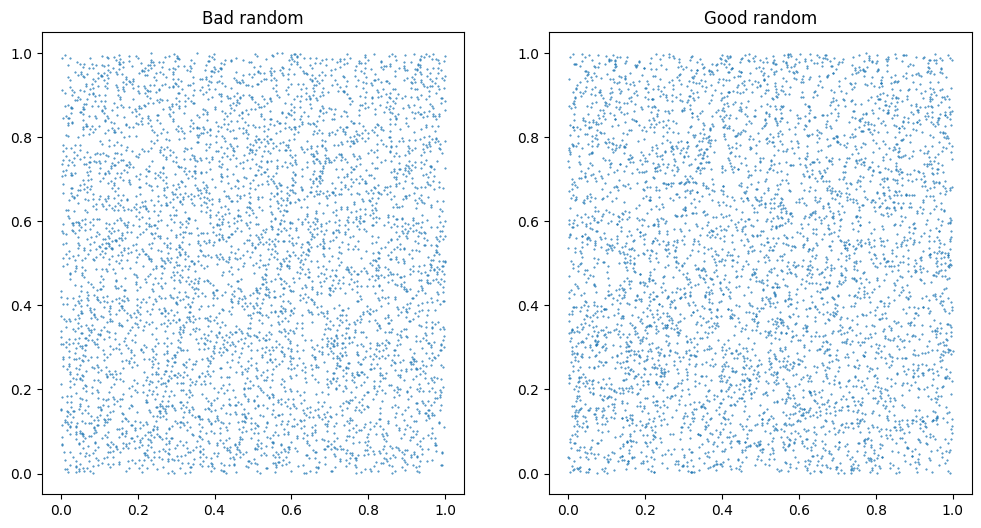

In [24]:
#bad random -> a*x(i) + c (mod m)
def bad_random(x):
    #x 또한 seed 지만 함수를 거치면서 바뀌는 식으로 설계할 것임
    seed = (259*x+17)%65536
    # a = 259, c = 17, m = 65536
    ran = float(seed) / 65536 #ran은 seed값을 normalization한 값
    return ran, seed

n = 5000
seed = 567

#numpy array 만들기
random1x = np.zeros(n)
random1y = np.zeros(n)

for i in range(n):
    result = bad_random(seed)
    random1x[i] = result[0]
    #random1x[i] = result[0]을 통해서 5000개의 0으로 이루어진 배열을 ran값으로 바꿈
    seed = result[1]
    #새로운 seed 형성, (좋지 않은 random을 만들기 위해 seed를 한번만 변경)
    result = bad_random(seed)
    random1y[i] = result[0]
    #여기서 seed를 한 번 더 바꿔주면 좋은 random이 생성됨! 

#good random
seed = 567
random2 = np.random.random([5000,5000])
#x[row_index,column_index]
random2x = random2[:,0] #행으로는 모두 읽고, 열에서는 첫번째 열만 읽어 x축으로 두는 것임. 
random2y = random2[:,1] #행으로는 모두 읽고, 열에서는 첫번째 열만 읽어 y축으로 두는 것임.

plt.figure(figsize = (12,6))

plt.subplot(121) #subplot(pos, **kwargs): pos는 세 자리 정수, 첫번째는 행 수, 두번째는 열 수, 세번째는 서브플롯의 인덱스
plt.scatter(random1x, random1y, s=0.2) #점의 사이즈가 0.2
plt.title("Bad random")

plt.subplot(122) 
plt.scatter(random2x, random2y, s=0.2) #점의 사이즈가 0.2
plt.title("Good random")

[-0.35623708 -0.33319201 -0.31014694 -0.28710188 -0.26405681 -0.24101174
 -0.21796668 -0.19492161 -0.17187654 -0.14883148 -0.12578641 -0.10274134
 -0.07969628 -0.05665121 -0.03360614 -0.01056108  0.01248399  0.03552906
  0.05857412  0.08161919  0.10466426  0.12770932  0.15075439  0.17379946
  0.19684452  0.21988959  0.24293466  0.26597972  0.28902479  0.31206986
  0.33511492]


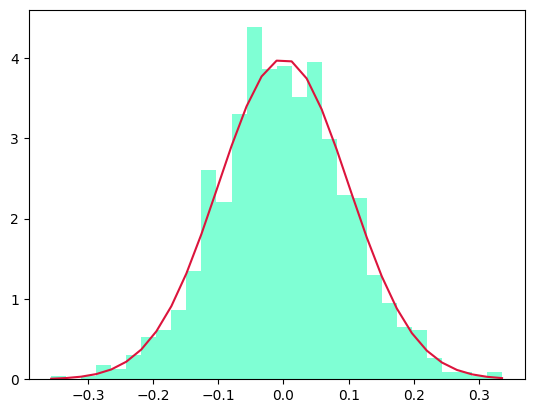

In [25]:
#Gaussian distribtion (정규분포), 평균과 표준편차에 영향을 받음
mean = 0.0 #평균값
sigma = 0.1 #표준편차 (sigma 값을 늘리면 그래프는 더욱 퍼진 형태 됨.)
data = np.random.normal(mean, sigma, 1000) #particle is 1000, normal distribution을 따름. data를 sampling 하는 과정

def gaussian(x, mean, sigma):
    coeff = 1.0/(sigma*np.sqrt(2*np.pi))
    value = coeff*np.exp(-(x-mean)**2/(2.0*sigma**2))
    return value

#normal distribution이기 때문에 Gaussian distribtion 형태를 따르게 됨.

count, bins, ignored = plt.hist(data, 30, color='aquamarine', density=True) #히스토그램 그리기
#각각의 빈에 몇개가 있는 카운트, 빈의 위치, 나머지는 무시
print(bins)

y = gaussian(bins, mean, sigma)
plt.plot(bins, y, color='crimson')

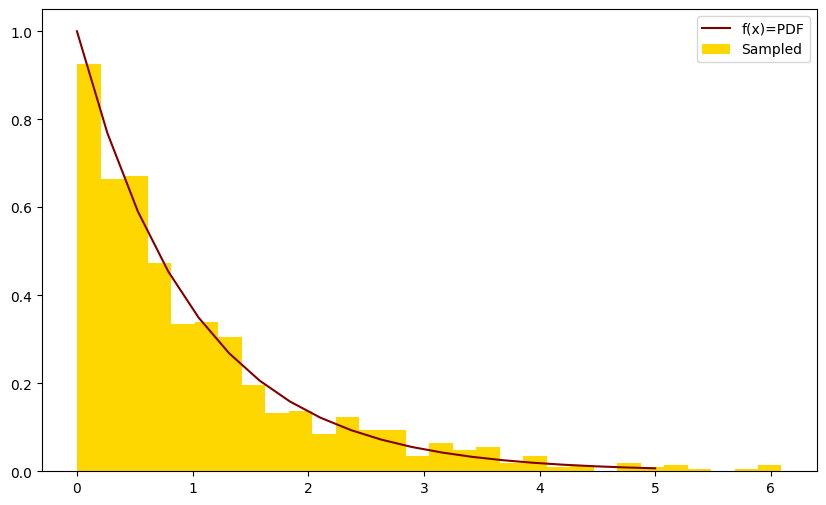

In [26]:
#probability density funtion
#함수 f(x)의 [a,b] 구간에서 확률변수 X가 구간에 포함될 확률 P(a<=X<=b)는 INTEGRAL(a to b) f(x) dx 가 된다. 

n = 20
x = np.linspace(0, 5, n)
y = np.exp(-x)

plt.figure(figsize=(10,6))
plt.plot(x,y,'-',color='maroon',label='f(x)=PDF')
plt.legend()

ynow = np.random.uniform(0,1,1000)
xnow = -np.log(1.0-ynow) #xnow는 y의 CDF의 역함수
count, bins, ignored = plt.hist(xnow, bins=30, density=1, label='Sampled', color='gold')
plt.legend()

[0.09209074 0.11611442 0.12812625 0.17016768 0.20820516 0.2342308
 0.3223176  0.48647936 0.53652868 0.71470425 0.71470425 0.8428305
 1.02100607 1.30528619 1.61759393 1.67565114 1.97794902 2.29826465
 2.54650926 3.01096693]


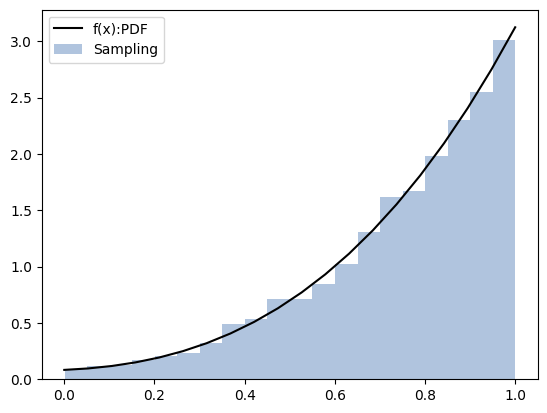

In [27]:
#3./2.*x*3 + 11./8.*x**2 + 1./6.*x +1./12.

def f(x):
    return 3./2.*x**3 + 11./8.*x**2 + 1./6.*x +1./12.

n = 20
x = np.linspace(0,1,n)
y = f(x)
plt.plot(x,y,'-',color='black', label='f(x):PDF')
plt.legend()

#Cummulative Distribution Function (CDF)
#누적분포함수: 주어진 확률 변수가 특정 값보다 작거나 같은 확률을 나타내는 함수
#적분을 0부터 x까지 적분

ycum = np.zeros(n)
for i in range(n):
    ycum[i] = quad(f, 0.0, x[i])[0] #F(x)

#Normalization -> [0,1]
M = np.max(ycum)
ycum = ycum/M
#ycum을 M으로 나누어 Normalization

#역함수를 구해서 uniform sampling 함수를 넣어야 함.
#함수를 해석학적으로 구하지 못하면 수치를 이용해서 구하셈.
#interpolation(내삽)을 이용해서 구함

n = 10000
X = [] #빈 array를 만들어 xnow가 들어갈 자리를 만들어줌
for i in range(n):
    ynow = np.random.uniform(0,1)
    #inverse function에 넣어줘야 함.
    xnow = np.interp(ynow,ycum,x)
    #numpy.interp(y1, y, x): y,x 두개의 array에서 y1을 넣었을 때 대응되는 x값 구하기
    X.append(xnow)

count, bins2, ignored = plt.hist(X, bins=20, density=1, label='Sampling', color='lightsteelblue')
plt.legend()
print(count)

Rejection number / Sampling2

Maximun value of y =  3.125
Accepted Rate: 32.53 %


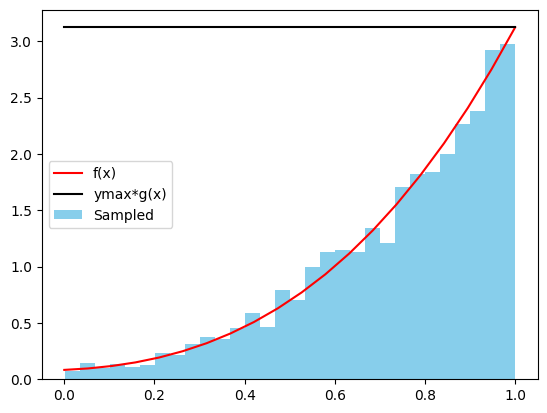

In [28]:
def f(x):
    return 3./2.*x**3 + 11./8.*x**2 + 1./6.*x +1./12.

#ymax 이상의 값을 가지는 함수를 생성하기 위해
#모든 g(x)의 값을 1로 지정한후 ymax로 곱해주면 모두 ymax 이상의 값!
def g(x):
    return np.ones(np.size(x))
    #값은 1로만 지정하기 위해 np.ones
    #np.size(x) x의 크기만큼 모두 1로 변환하기 위해

x = np.linspace(0, 1, 20)
y = f(x)
ymax = np.max(y)
print('Maximun value of y = ', ymax)

plt.plot(x, y, color='red', label='f(x)')
plt.plot(x, ymax*g(x), color='black', label='ymax*g(x)')
plt.legend()

X = []
n = 10000
for i in range(n):
    xnow = np.random.uniform(0,1)
    yrand = np.random.uniform(0, ymax*g(xnow))
    #판단을 해줘야 함. 
    #yrand이 f(xnow)보다 아래에 있으면 accept, 위에 있으면 reject
    if f(xnow) > yrand:
        X.append(xnow)

plt.hist(X, bins=30, density=1, color='skyblue', label='Sampled')
plt.legend()

#얼만큼의 비율로 accept되었는가?
print('Accepted Rate:', (len(X)/n)*100,'%')

Maximun value of y =  0.8476587720876128
Accepted Rate: 39.0 %


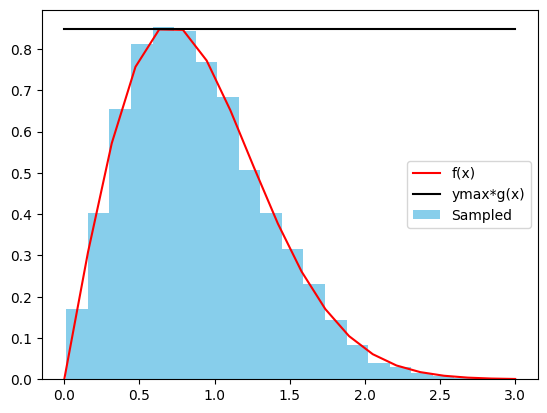

In [29]:
def f(x):
    return 2.0*x*np.exp(-x**2)

#ymax 이상의 값을 가지는 함수를 생성하기 위해
#모든 g(x)의 값을 1로 지정한후 ymax로 곱해주면 모두 ymax 이상의 값!
def g(x):
    return np.ones(np.size(x))
    #값은 1로만 지정하기 위해 np.ones
    #np.size(x) x의 크기만큼 모두 1로 변환하기 위해

x = np.linspace(0, 3, 20)
y = f(x)
ymax = np.max(y)
print('Maximun value of y = ', ymax)

plt.plot(x, y, color='red', label='f(x)')
plt.plot(x, ymax*g(x), color='black', label='ymax*g(x)')
plt.legend()

X = []
n = 20000
for i in range(n):
    xnow = np.random.uniform(0,3)
    yrand = np.random.uniform(0, ymax*g(xnow))
    #판단을 해줘야 함. 
    #yrand이 f(xnow)보다 아래에 있으면 accept, 위에 있으면 reject
    if f(xnow) > yrand:
        X.append(xnow)

plt.hist(X, bins=20, density=1, color='skyblue', label='Sampled')
plt.legend()

#얼만큼의 비율로 accept되었는가?
print('Accepted Rate:', (len(X)/n)*100,'%')

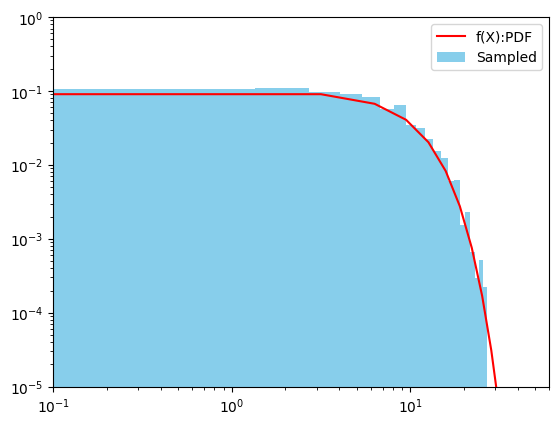

In [42]:
def f(x):
    rc = 10.0
    return 1./rc*np.exp(-x**2/rc**2.0)

rmin = 0.0
rmax = 60.0
n = 20
x = np.linspace(rmin, rmax, n)
y = f(x)

ycum = np.zeros(n)
for i in range(n):
    value = quad(f, 0.0, x[i])[0]
    ycum[i] = value

plt.loglog(x, y, color='red', label='f(X):PDF')
#은하의 density를 이용해서 표현하고 (중심부에서는 밀도가 높고 멀어질 수록 낮아짐)
#log를 이용해서 표현하고 loglog하면 inverse됨
plt.ylim(1e-5, 1.0)
plt.xlim(1e-1, 60.0)
#x와 y의 그래프에서 나올 범위 지정

M = np.max(ycum)
ycum = ycum/M

X = []
n = 10000

for i in range(n):
    ynow = np.random.uniform(0,1)
    xnow = np.interp(ynow, ycum, x)
    X.append(xnow)

plt.hist(X, bins=20, density=1, color='skyblue', label='Sampled')
plt.legend()

(-15.0, 15.0)

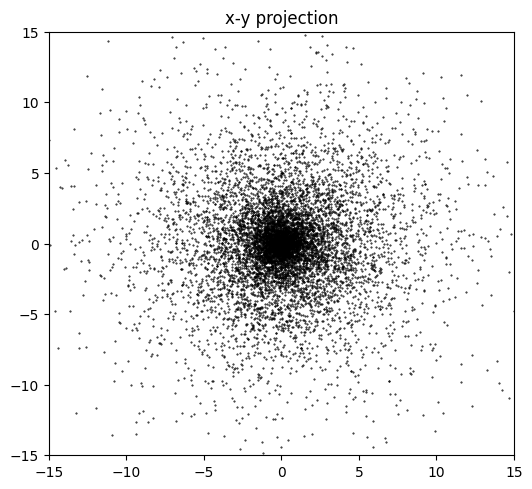

In [31]:
posx = []
posy = []

for i in range(n):
    phi = np.random.uniform(0,2*np.pi)
    theta = np.random.uniform(0,np.pi)
    posx.append(X[i]*np.sin(theta)*np.cos(phi))
    posy.append(X[i]*np.sin(theta)*np.sin(phi))

plt.figure(figsize=(6,5.5))
plt.scatter(posx,posy,color='black',s=0.2)
plt.title('x-y projection')
plt.xlim(-15,15)
plt.ylim(-15,15)

Comparisom of Two Distribution

[  6   9   9   8  14  19  20  30  44  50  51  71  80 111 110 115 139 202
 188 265 233 282 343 308 359 390 363 391 353 393 409 402 389 373 380 324
 320 285 288 253 233 202 185 155 149 122 107  68  79  51  48  48  37  31
  26  22  13   8   4   6]


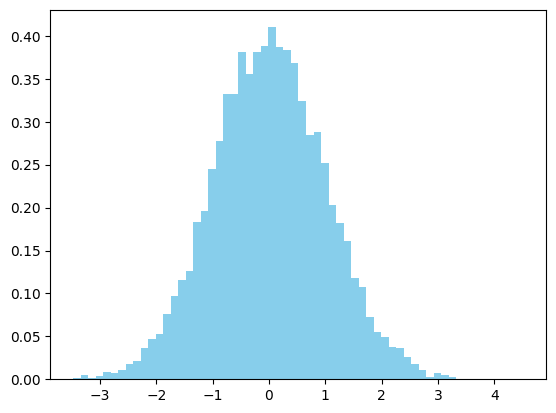

In [32]:
#파이썬에서 제공하는 기존의 분포를 가져다 쓸 것.
#Normal distribution

ndata = 10000
x0, sigma = 0, 1 #mean and standard deviation 
data = np.random.normal(x0, sigma, ndata) #normal(loc=0.0, scale=1.0, size=None), Draw random samples from a normal (Gaussian) distribution.

binmin = -3.
binmax = 3.
binsize = 0.1
nbin = int((binmax-binmin)/binsize)
hist, bin_edges = np.histogram(data, bins=nbin, range=(binmin,binmax))
#np.histogram(a, bins=10, range=None, density=None, weights=None)

print(hist)

count, bins, ignored = plt.hist(data, nbin, color='skyblue', density=1)

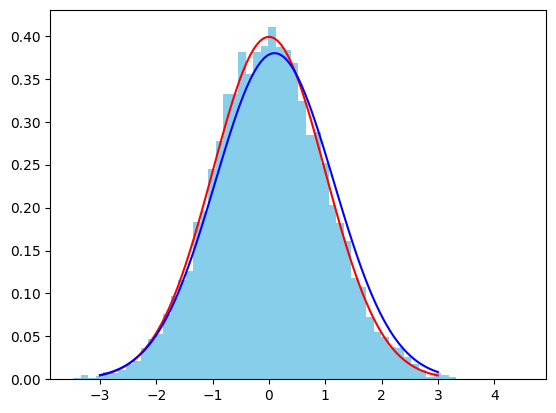

In [33]:
#gaussian함수를 직접 만들어 보자.
def int_func(x, sigma, x0):
    value = 1./np.sqrt(2.0*np.pi*sigma**2.0)*np.exp(-(x-x0)**2/(2.0*sigma**2))
    return value

binmin = -3.
binmax = 3.
binsize = 0.1
nbin = int((binmax-binmin)/binsize)
hist, bin_edges = np.histogram(data, bins=nbin, range=(binmin,binmax))

count, bins, ignored = plt.hist(data, nbin, color='skyblue', density=1)

sigma = 1.0
x0 = 0.0
xarr = np.linspace(-3, 3, 100)
y = int_func(xarr, sigma, x0)
plt.plot(xarr, y, color='red', label='model1')

sigma = 1.05
x0 = 0.1
y = int_func(xarr, sigma, x0)
plt.plot(xarr, y, color='blue', label='model2')


In [34]:
model1 = []
model2 = []
xarr = []
for i in range(nbin):
    xa = binmin + binsize*i
    xb = binmin + binsize*(i+1)
    sigma = 1.0
    x0 = 0.
    value, err = quad(int_func, xa, xb, args=(sigma,x0))
    model1.append(value*ndata)
    xarr.append(xa)

    sigma = 1.05
    x0 = 0.1
    value, err = quad(int_func, xa, xb, args=(sigma,x0))
    model2.append(value*ndata)
    xarr.append(xa)

xarr = np.array(xarr)
model1 = np.array(model1)
model2 = np.array(model2)
#array로 변환하는 것을 꼭꼭 잊지 말자!!!!

chisq1 = sum((hist - model1)**2/model1)
print('chisq1 =',chisq1)
chisq2 = sum((hist - model2)**2/model2)
print('chisq2 =',chisq2)

chisq1 = 60.801110661202756
chisq2 = 164.8766333296769


In [35]:
import scipy.stats
from scipy.stats import stats

data1 = [2,3,1,6,3,3,4,2]
print(np.mean(data1))
print(scipy.stats.variation(data1))
print(stats.kurtosis(data1))

3.0
0.47140452079103173
0.125


C:\Users\jimin\AppData\Local\Temp\ipykernel_20388\4090330745.py:7: DeprecationWarning: Please import `kurtosis` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  print(stats.kurtosis(data1))


In [36]:
from scipy.stats import chisquare #stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)
from scipy.stats import ks_2samp #ks_2samp(data1,data2,alternative='two-sided',method='auto',*,axis=0,nan_policy='propagate',keepdims=False,)
chisquare([16,18,16,14,12,12], f_exp=[16,16,16,16,16,8])

Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)

In [37]:
model11 = np.array(model1)*sum(hist)/sum(model1)
print(stats.chisquare(hist, model11))

Power_divergenceResult(statistic=60.80112309393552, pvalue=0.41082789105752465)


C:\Users\jimin\AppData\Local\Temp\ipykernel_20388\1447919025.py:2: DeprecationWarning: Please import `chisquare` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  print(stats.chisquare(hist, model11))


In [38]:
print(ks_2samp(model1,hist))
print(ks_2samp(model2,hist))

KstestResult(statistic=0.05, pvalue=0.9999997074905671, statistic_location=9.0, statistic_sign=-1)
KstestResult(statistic=0.11666666666666667, pvalue=0.8132812991497796, statistic_location=379.3714406625419, statistic_sign=1)
